# 逻辑回归与随机梯度下降

In [2]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
import random



filename = "C:\\Users\\admin\\Desktop\\Jupyter\\a9a.t.txt"
x_train, y_train = load_svmlight_file(filename, n_features=123)
filename = "C:\\Users\\admin\\Desktop\\Jupyter\\a9a.txt"
x_validate, y_validate = load_svmlight_file(filename, n_features=123)


#将-数据集中1变成0
yChange=pd.Series(y_train)
yChangeOver=yChange.replace(-1.0,0)
y_train=np.array(yChangeOver)
# print(y_train)

#将-数据集中1变成0
yChange=pd.Series(y_validate)
yChangeOver=yChange.replace(-1.0,0)
y_validate=np.array(yChangeOver)
# print(y_validate)

# print(x_train.shape)
# print(y_train.shape)
# (16281, 122)
# (16281,)

def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

m,n=np.shape(x_train)
learning_rate = 100
num_iter = 100
param = np.ones((1, n))
lossValidate=np.zeros((1, num_iter))



for k in range(num_iter):
    g = np.zeros((1, n))
    lossUnit1 = 0


    #随机梯度下降法(Stochastic gradient descent, SGD):
    #每次使用100组数组随机梯度下降
    for l in range(100):
        i=random.randint(0,m-1)
        for j in range(n):
            g[0, j] += (sigmoid(x_train[i] * param.T) - y_train[i]) * x_train[i, j]
    
    for i in range(n):
        param[0, i] = param[0, i] - (learning_rate * g[0, i] /m)
    #
    # print("第",k,"次迭代：")
    # print("参数：")
    # print(param)

    


    #loss function（验证集）
    for i in range(x_train.shape[0]):
        c = y_validate[i]*np.log(sigmoid(x_validate[i] * param.T))+(1-y_validate[i])*np.log(1-sigmoid(x_validate[i] * param.T))
        lossUnit1 += c

    lossValidate[0,k] = (-1)*lossUnit1 / m



print("验证误差：",lossValidate)




验证误差： [[ 8.26879332  5.99637722  3.84502498  1.67364532  0.83363658  0.70853086
   0.65210619  0.62814163  0.61711975  0.60007689  0.58755857  0.57262251
   0.5581283   0.54909043  0.54240714  0.53425431  0.53195431  0.52061856
   0.51736157  0.50544391  0.50018483  0.49450056  0.48891096  0.48934596
   0.48292965  0.48391911  0.47403377  0.47077204  0.46644422  0.4643158
   0.4638181   0.45967865  0.47161771  0.45979967  0.45187414  0.44924324
   0.44811873  0.44518972  0.44340517  0.44219692  0.44344134  0.439382
   0.43997335  0.43940028  0.44276985  0.43828406  0.43285418  0.431078
   0.42846824  0.42564743  0.42614586  0.42370774  0.42185866  0.42084388
   0.41950118  0.41759362  0.42162441  0.42076656  0.41656572  0.41273628
   0.41220632  0.41098979  0.41243424  0.42325026  0.41036831  0.40711125
   0.40592504  0.40656515  0.40383626  0.40458481  0.40235259  0.40141913
   0.40279863  0.399458    0.40249681  0.40040759  0.39744334  0.39638868
   0.39763575  0.39483295  0.39453746

In [3]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
import random


filename = "C:\\Users\\admin\\Desktop\\Jupyter\\a9a.t.txt"
x_train, y_train = load_svmlight_file(filename, n_features=123)
filename = "C:\\Users\\admin\\Desktop\\Jupyter\\a9a.txt"
x_validate, y_validate = load_svmlight_file(filename, n_features=123)


#将-数据集中1变成0
yChange=pd.Series(y_train)
yChangeOver=yChange.replace(-1.0,0)
y_train=np.array(yChangeOver)
# print(y_train)

#将-数据集中1变成0
yChange=pd.Series(y_validate)
yChangeOver=yChange.replace(-1.0,0)
y_validate=np.array(yChangeOver)
# print(y_validate)

# print(x_train.shape)
# print(y_train.shape)
# (16281, 122)
# (16281,)

def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

m,n=np.shape(x_train)
learning_rate = 100
num_iter = 100
param = np.ones((1, n))
lossValidate=np.zeros((1, num_iter))
Gamma = 10
Gt=np.ones((1,n))
deltaT=np.ones((1,n))*10000
deltaParam=np.ones((1,n))
Mt=np.zeros((1,n))


for k in range(num_iter):
    g = np.zeros((1, n))
    lossUnit1 = 0



    #Momentum:
    for l in range(100):
        i = random.randint(0, m - 1)
        for j in range(n):
            g[0, j] += (sigmoid(x_train[i] * param.T) - y_train[i]) * x_train[i, j]
    #第0次迭代无先前梯度
    if k==0:
        pre_grad=g/m
        for i in range(n):
            param[0, i] = param[0, i] - (learning_rate * g[0, i] / m)
    
    #除了第0次迭代后每次迭代用目前梯度*学习率+先前梯度*Gamma更新参数
    if k!=0:
        for i in range(n):
            param[0, i] = param[0, i] - (learning_rate * g[0, i] / m)-(pre_grad[0,i]*Gamma)
        pre_grad = g / m
    
#     print("第", k, "次迭代：")
#     print("参数：")
#     print(param)


    


    #loss function（验证集）
    for i in range(x_train.shape[0]):
        c = y_validate[i]*np.log(sigmoid(x_validate[i] * param.T))+(1-y_validate[i])*np.log(1-sigmoid(x_validate[i] * param.T))
        lossUnit1 += c

    lossValidate[0,k] = (-1)*lossUnit1 / m



print("验证误差：",lossValidate)





验证误差： [[ 8.3431431   6.01453244  3.67590957  1.3759899   0.7305465   0.65834831
   0.63192834  0.6100394   0.59468825  0.57538579  0.56183343  0.55383854
   0.54286109  0.53260411  0.52542661  0.51758393  0.51468532  0.50577026
   0.50129912  0.4966694   0.49203205  0.48685407  0.48526299  0.48214027
   0.48193332  0.4712113   0.46796527  0.46470674  0.46167659  0.45972742
   0.45751791  0.45443989  0.45192741  0.45064308  0.44929243  0.44733177
   0.44518903  0.44294566  0.44183739  0.43819938  0.43811871  0.44160732
   0.43566829  0.43182794  0.43001846  0.42870836  0.42883627  0.4280925
   0.42566823  0.42486357  0.42366834  0.42453494  0.42775871  0.42715941
   0.42173007  0.42569136  0.41686699  0.41283744  0.41326407  0.41122563
   0.41077459  0.41014788  0.41418233  0.40949403  0.40628904  0.40436356
   0.40567396  0.40627076  0.40632189  0.40310253  0.4068883   0.40324387
   0.39763265  0.3986028   0.39777027  0.39683876  0.39777693  0.39524867
   0.39491322  0.39629866  0.3945

In [5]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
import random


filename = "C:\\Users\\admin\\Desktop\\Jupyter\\a9a.t.txt"
x_train, y_train = load_svmlight_file(filename, n_features=123)
filename = "C:\\Users\\admin\\Desktop\\Jupyter\\a9a.txt"
x_validate, y_validate = load_svmlight_file(filename, n_features=123)


#将-数据集中1变成0
yChange=pd.Series(y_train)
yChangeOver=yChange.replace(-1.0,0)
y_train=np.array(yChangeOver)
# print(y_train)

#将-数据集中1变成0
yChange=pd.Series(y_validate)
yChangeOver=yChange.replace(-1.0,0)
y_validate=np.array(yChangeOver)
# print(y_validate)

# print(x_train.shape)
# print(y_train.shape)
# (16281, 122)
# (16281,)

def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

m,n=np.shape(x_train)
learning_rate = 100
num_iter = 100
param = np.ones((1, n))
lossValidate=np.zeros((1, num_iter))
Gamma = 10
Gt=np.ones((1,n))
deltaT=np.ones((1,n))*10000
deltaParam=np.ones((1,n))
Mt=np.zeros((1,n))


for k in range(num_iter):
    g = np.zeros((1, n))
    lossUnit1 = 0
    #NAG(Nesterov accelerated gradient):

    #第0次迭代 无先前梯度 直接随机梯度下降
    if k==0:
        for l in range(100):
            i = random.randint(0, m - 1)
            for j in range(n):
                g[0, j] += (sigmoid(x_train[i] * param.T) - y_train[i]) * x_train[i, j]
        #记录第0次梯度
        pre_grad = g / m
        #更新参数 根据梯度*学习率
        for i in range(n):
            param[0, i] = param[0, i] - (learning_rate * g[0, i] / m)
    
    #除了第0次迭代后 均为先根据之前的梯度更新param后再计算梯度 之后再根据目前梯度*学习率+先前梯度*Gamma更新参数
    if k!=0:
        #先利用先前梯度*Gamma更新出新的参数再计算出新的梯度
        paramNew = param.copy()
        for i in range(n):
            paramNew[0, i] = paramNew[0, i] - (pre_grad[0, i] * Gamma)
        #利用新的参数算出新的梯度
        for l in range(100):
            i = random.randint(0, m - 1)
            for j in range(n):
                g[0, j] += (sigmoid(x_train[i] * paramNew.T) - y_train[i]) * x_train[i, j]
        #根据新的梯度*学习率+先前梯度*Gamma更新参数
        for i in range(n):
            param[0, i] = param[0, i] - (learning_rate * g[0, i] / m)-(pre_grad[0,i]*Gamma)
        pre_grad = g / m
    
    # print("第", k, "次迭代：")
    # print("参数：")
    # print(param)

    
    #loss function（验证集）
    for i in range(x_train.shape[0]):
        c = y_validate[i]*np.log(sigmoid(x_validate[i] * param.T))+(1-y_validate[i])*np.log(1-sigmoid(x_validate[i] * param.T))
        lossUnit1 += c

    lossValidate[0,k] = (-1)*lossUnit1 / m



print("验证误差：",lossValidate)



验证误差： [[ 8.24859911  5.69541007  3.19168647  1.35099932  0.764844    0.68178784
   0.64463376  0.61938988  0.60548576  0.58477249  0.57649972  0.57007336
   0.55083197  0.54003436  0.52812133  0.52265118  0.51182741  0.50550553
   0.50473215  0.49677611  0.49105557  0.48556695  0.48087332  0.4771294
   0.4734916   0.47054096  0.46748251  0.46520028  0.46055297  0.46737161
   0.46038885  0.46010732  0.451655    0.44930984  0.44584793  0.44805714
   0.44478464  0.43984565  0.43695538  0.433985    0.43406053  0.4304988
   0.43504762  0.43136828  0.4263707   0.42435717  0.42320751  0.42461894
   0.42185741  0.42140703  0.4200382   0.41900653  0.41727711  0.4130938
   0.41207516  0.41033442  0.41762696  0.40783801  0.40946262  0.40618822
   0.40482949  0.40390658  0.40369124  0.40191607  0.40197126  0.40029069
   0.40173342  0.39857351  0.39721682  0.39685531  0.39542521  0.39489999
   0.39358032  0.39228795  0.39343084  0.39084169  0.39057048  0.3922967
   0.38846004  0.38781209  0.3870388

In [12]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
import random


filename = "C:\\Users\\admin\\Desktop\\Jupyter\\a9a.t.txt"
x_train, y_train = load_svmlight_file(filename, n_features=123)
filename = "C:\\Users\\admin\\Desktop\\Jupyter\\a9a.txt"
x_validate, y_validate = load_svmlight_file(filename, n_features=123)


#将-数据集中1变成0
yChange=pd.Series(y_train)
yChangeOver=yChange.replace(-1.0,0)
y_train=np.array(yChangeOver)
# print(y_train)

#将-数据集中1变成0
yChange=pd.Series(y_validate)
yChangeOver=yChange.replace(-1.0,0)
y_validate=np.array(yChangeOver)
# print(y_validate)

# print(x_train.shape)
# print(y_train.shape)
# (16281, 122)
# (16281,)

def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

m,n=np.shape(x_train)
learning_rate = 100
num_iter = 100
param = np.ones((1, n))
lossValidate=np.zeros((1, num_iter))
Gamma = 10
Gt=np.ones((1,n))*100
deltaT=np.ones((1,n))*10000
deltaParam=np.ones((1,n))
Mt=np.zeros((1,n))


for k in range(num_iter):
    g = np.zeros((1, n))
    lossUnit1 = 0

    #RMSProp：
    # 每次使用100组数组随机梯度下降
    #利用Gt计算学习率
    for l in range(100):
        i=random.randint(0,m-1)
        for j in range(n):
            g[0, j] += (sigmoid(x_train[i] * param.T) - y_train[i]) * x_train[i, j]
    g[0] /= m
    Gt[0] = 0.9 * Gt[0] + 0.1 * g[0] * g[0]
    param[0] = param[0] - ((100/np.sqrt(Gt[0]+0.00000001)) * g[0])
    
#     print("第",k,"次迭代：")
#     print("参数：")
#     print(param)


    #loss function（验证集）
    for i in range(x_train.shape[0]):
        c = y_validate[i]*np.log(sigmoid(x_validate[i] * param.T))+(1-y_validate[i])*np.log(1-sigmoid(x_validate[i] * param.T))
        lossUnit1 += c

    lossValidate[0,k] = (-1)*lossUnit1 / m

    
print("验证误差：",lossValidate)







验证误差： [[ 10.29751087  10.03870758   9.78485924   9.53912331   9.27417438
    8.98290914   8.63788629   8.29129791   7.92105722   7.57644411
    7.20265944   6.78303861   6.30835728   5.84905314   5.32980835
    4.88018765   4.32672762   3.76021122   3.17664386   2.577171
    2.01832347   1.55353577   1.21038594   0.98419864   0.86062761
    0.76705504   0.71932329   0.69068377   0.6699974    0.6541513
    0.64355015   0.62652435   0.61782854   0.60966962   0.60227478
    0.5918085    0.58119907   0.56923849   0.55851982   0.55249636
    0.54535473   0.53537087   0.52883785   0.52122021   0.51076391
    0.50382065   0.5017199    0.50349878   0.4890988    0.4843524
    0.47834454   0.49497583   0.45966823   0.46582185   0.4471099
    0.45008747   0.44193511   0.44002686   0.43395398   0.43002845
    0.42920803   0.42431896   0.4297869    0.42675413   0.41641322
    0.42189142   0.40578548   0.40429557   0.40051069   0.39826425
    0.39785105   0.39142946   0.39083987   0.41828421   0.423

In [7]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
import random


filename = "C:\\Users\\admin\\Desktop\\Jupyter\\a9a.t.txt"
x_train, y_train = load_svmlight_file(filename, n_features=123)
filename = "C:\\Users\\admin\\Desktop\\Jupyter\\a9a.txt"
x_validate, y_validate = load_svmlight_file(filename, n_features=123)


#将-数据集中1变成0
yChange=pd.Series(y_train)
yChangeOver=yChange.replace(-1.0,0)
y_train=np.array(yChangeOver)
# print(y_train)

#将-数据集中1变成0
yChange=pd.Series(y_validate)
yChangeOver=yChange.replace(-1.0,0)
y_validate=np.array(yChangeOver)
# print(y_validate)

# print(x_train.shape)
# print(y_train.shape)
# (16281, 122)
# (16281,)

def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

m,n=np.shape(x_train)
learning_rate = 100
num_iter = 100
param = np.ones((1, n))
lossValidate=np.zeros((1, num_iter))
Gamma = 10
Gt=np.ones((1,n))
deltaT=np.ones((1,n))*10000
deltaParam=np.ones((1,n))
Mt=np.zeros((1,n))


for k in range(num_iter):
    g = np.zeros((1, n))
    lossUnit1 = 0


    # AdaDelta：
    # 每次使用100组数组随机梯度下降
    # 利用Gt和deltaT计算学习率
    for l in range(100):
        i=random.randint(0,m-1)
        for j in range(n):
            g[0, j] += (sigmoid(x_train[i] * param.T) - y_train[i]) * x_train[i, j]
    g[0]/=m
    Gt[0]=0.95*Gt[0]+0.05*g[0]*g[0]
    deltaParam[0]=(np.sqrt(deltaT[0]+0.00000001)/np.sqrt(Gt[0]+0.00000001) )* g[0]
    param[0] -=deltaParam[0]
    deltaT[0]=0.95*deltaT[0]+0.05*deltaParam[0]*deltaParam[0]
    # print("第",k,"次迭代：")
    # print("参数：")
    # print(param)



    #loss function（验证集）
    for i in range(x_train.shape[0]):
        c = y_validate[i]*np.log(sigmoid(x_validate[i] * param.T))+(1-y_validate[i])*np.log(1-sigmoid(x_validate[i] * param.T))
        lossUnit1 += c

    lossValidate[0,k] = (-1)*lossUnit1 / m

    
print("验证误差：",lossValidate)






验证误差： [[ 8.2138892   5.76065678  3.50105092  1.51147733  0.74455898  0.64511687
   0.63199049  0.60705994  0.59666956  0.58542167  0.57043576  0.56192313
   0.54873126  0.54200229  0.53530113  0.52520012  0.51803326  0.50864837
   0.50591896  0.50315341  0.49935185  0.50062359  0.49593924  0.48698944
   0.47888515  0.47541884  0.47479814  0.47627877  0.46796991  0.46576629
   0.46187621  0.46512655  0.45656469  0.46147847  0.46077555  0.45279571
   0.45108372  0.4510333   0.44969034  0.44599097  0.44746627  0.44262092
   0.44880472  0.43806505  0.43655006  0.43621114  0.43377432  0.4324947
   0.43165313  0.4291649   0.43049472  0.42836803  0.42708111  0.42400818
   0.42341179  0.42156484  0.42034477  0.42534152  0.41646064  0.41476464
   0.41714118  0.4133356   0.41223977  0.41195625  0.41015838  0.4098104
   0.40848526  0.40725724  0.40452601  0.40357997  0.40342728  0.40240967
   0.39988124  0.39910356  0.39836359  0.39802694  0.39640544  0.39689405
   0.39560031  0.395391    0.39548

In [8]:
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
import random


filename = "C:\\Users\\admin\\Desktop\\Jupyter\\a9a.t.txt"
x_train, y_train = load_svmlight_file(filename, n_features=123)
filename = "C:\\Users\\admin\\Desktop\\Jupyter\\a9a.txt"
x_validate, y_validate = load_svmlight_file(filename, n_features=123)


#将-数据集中1变成0
yChange=pd.Series(y_train)
yChangeOver=yChange.replace(-1.0,0)
y_train=np.array(yChangeOver)
# print(y_train)

#将-数据集中1变成0
yChange=pd.Series(y_validate)
yChangeOver=yChange.replace(-1.0,0)
y_validate=np.array(yChangeOver)
# print(y_validate)

# print(x_train.shape)
# print(y_train.shape)
# (16281, 122)
# (16281,)

def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

m,n=np.shape(x_train)
learning_rate = 100
num_iter = 100
param = np.ones((1, n))
lossValidate=np.zeros((1, num_iter))
Gamma = 10
Gt=np.ones((1,n))
deltaT=np.ones((1,n))*10000
deltaParam=np.ones((1,n))
Mt=np.zeros((1,n))


for k in range(num_iter):
    g = np.zeros((1, n))
    lossUnit1 = 0

    #Adam:
    for l in range(100):
        i=random.randint(0,m-1)
        for j in range(n):
            g[0, j] += (sigmoid(x_train[i] * param.T) - y_train[i]) * x_train[i, j]
    g[0]/=m
    Mt[0] =0.9 * Mt[0] + 0.1 * g[0]
    Gt[0] =0.999 * Gt[0] + 0.001 * g[0] * g[0]
    #alpha = 100 * np.sqrt(1 - np.power(0.999,k)) / (1 - np.power(0.9,k))
    s = Mt[0] / 0.1
    r = Gt[0] / 0.001
    alpha = 100 * s / (np.sqrt(r) + 0.000001)
    #param[0] -= alpha * Mt[0] / np.sqrt(Gt[0]+0.00000001)
    param[0] -= alpha
#     print("第",k,"次迭代：")
#     print("参数：")
#     print(param)


    #loss function（验证集）
    for i in range(x_train.shape[0]):
        c = y_validate[i]*np.log(sigmoid(x_validate[i] * param.T))+(1-y_validate[i])*np.log(1-sigmoid(x_validate[i] * param.T))
        lossUnit1 += c

    lossValidate[0,k] = (-1)*lossUnit1 / m

print("验证误差：",lossValidate)









验证误差： [[ 10.45866618  10.31971011  10.13022771   9.88930804   9.6047299
    9.27390903   8.90476546   8.50039041   8.06798966   7.61019396
    7.13021231   6.62213662   6.08502182   5.53207862   4.95869072
    4.37060377   3.7691796    3.17150278   2.57771981   2.01730414
    1.52916507   1.14562565   0.8821422    0.73343853   0.67106655
    0.66532721   0.69111585   0.73066505   0.77531048   0.81973418
    0.86111473   0.89443216   0.92228782   0.94309177   0.95692149
    0.96278239   0.96203025   0.956981     0.94717079   0.93395652
    0.91733424   0.89843022   0.87755974   0.85722873   0.83312539
    0.80602458   0.77938744   0.75109201   0.72254696   0.69343024
    0.66624658   0.64017999   0.61591007   0.59278548   0.57222815
    0.55518221   0.54136647   0.52985208   0.52113806   0.51461433
    0.51045021   0.50831206   0.50751477   0.5080633    0.50956665
    0.51162813   0.51406355   0.51663015   0.51936905   0.52143788
    0.52266605   0.5225652    0.52199462   0.52020237   0

<IPython.core.display.Javascript object>


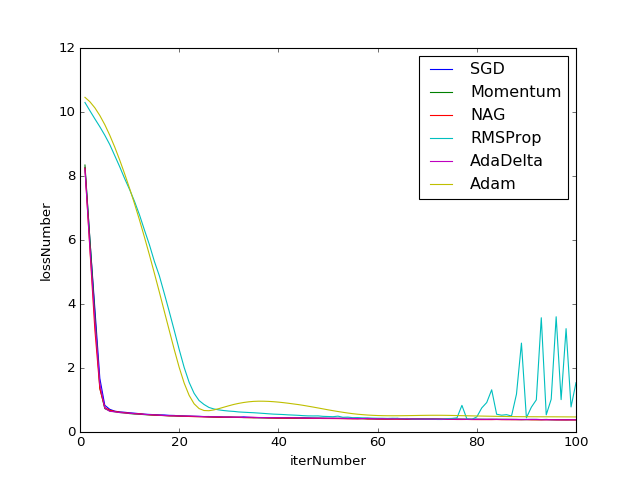

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
num_iter=100
x=np.arange( 1,num_iter+1,1)
lossSGD=np.array([[ 8.26879332 ,5.99637722  ,3.84502498  ,1.67364532 , 0.83363658 , 0.70853086,
   0.65210619 , 0.62814163 , 0.61711975 , 0.60007689 , 0.58755857 , 0.57262251,
   0.5581283   ,0.54909043  ,0.54240714  ,0.53425431  ,0.53195431  ,0.52061856,
   0.51736157  ,0.50544391  ,0.50018483  ,0.49450056  ,0.48891096  ,0.48934596,
   0.48292965  ,0.48391911  ,0.47403377  ,0.47077204  ,0.46644422  ,0.4643158,
   0.4638181   ,0.45967865  ,0.47161771  ,0.45979967  ,0.45187414  ,0.44924324,
   0.44811873  ,0.44518972  ,0.44340517  ,0.44219692  ,0.44344134  ,0.439382,
   0.43997335  ,0.43940028  ,0.44276985  ,0.43828406  ,0.43285418  ,0.431078,
   0.42846824  ,0.42564743  ,0.42614586  ,0.42370774  ,0.42185866  ,0.42084388,
   0.41950118  ,0.41759362  ,0.42162441  ,0.42076656  ,0.41656572  ,0.41273628,
   0.41220632  ,0.41098979  ,0.41243424  ,0.42325026  ,0.41036831  ,0.40711125,
   0.40592504  ,0.40656515  ,0.40383626  ,0.40458481  ,0.40235259  ,0.40141913,
   0.40279863  ,0.399458    ,0.40249681  ,0.40040759  ,0.39744334  ,0.39638868,
   0.39763575  ,0.39483295  ,0.39453746  ,0.3941459   ,0.395093    ,0.39272429,
   0.39215568  ,0.39145118  ,0.39117908  ,0.39077912  ,0.39141245  ,0.39229555,
   0.39357084  ,0.39232112  ,0.38871702  ,0.38782614  ,0.38754888  ,0.38709101,
   0.38600297  ,0.38673011  ,0.3855548   ,0.38881596]])
lossMomentum=[[ 8.3431431,   6.01453244  ,3.67590957  ,1.3759899   ,0.7305465  , 0.65834831,
   0.63192834  ,0.6100394 ,  0.59468825  ,0.57538579 , 0.56183343  ,0.55383854,
   0.54286109  ,0.53260411 , 0.52542661  ,0.51758393  ,0.51468532  ,0.50577026,
   0.50129912  ,0.4966694   ,0.49203205  ,0.48685407  ,0.48526299  ,0.48214027,
   0.48193332  ,0.4712113   ,0.46796527  ,0.46470674  ,0.46167659  ,0.45972742,
   0.45751791  ,0.45443989  ,0.45192741  ,0.45064308  ,0.44929243  ,0.44733177,
   0.44518903  ,0.44294566  ,0.44183739  ,0.43819938  ,0.43811871  ,0.44160732,
   0.43566829  ,0.43182794  ,0.43001846  ,0.42870836  ,0.42883627  ,0.4280925,
   0.42566823  ,0.42486357  ,0.42366834  ,0.42453494  ,0.42775871  ,0.42715941,
   0.42173007  ,0.42569136  ,0.41686699  ,0.41283744  ,0.41326407  ,0.41122563,
   0.41077459  ,0.41014788  ,0.41418233  ,0.40949403  ,0.40628904  ,0.40436356,
   0.40567396  ,0.40627076  ,0.40632189  ,0.40310253  ,0.4068883   ,0.40324387,
   0.39763265  ,0.3986028   ,0.39777027  ,0.39683876  ,0.39777693  ,0.39524867,
   0.39491322  ,0.39629866  ,0.39450988  ,0.39299595  ,0.39248817  ,0.39604015,
   0.39397416  ,0.39506575  ,0.39137704  ,0.39122507  ,0.38723127  ,0.38732178,
   0.38835261  ,0.38613893  ,0.38796286  ,0.39243861  ,0.38443863  ,0.38456041,
   0.38531501  ,0.38323593  ,0.38590443  ,0.38287258]]
lossNAG= [[ 8.24859911  ,5.69541007 , 3.19168647 , 1.35099932  ,0.764844  ,  0.68178784,
   0.64463376 , 0.61938988  ,0.60548576  ,0.58477249  ,0.57649972 , 0.57007336,
   0.55083197 , 0.54003436  ,0.52812133  ,0.52265118  ,0.51182741  ,0.50550553,
   0.50473215 , 0.49677611  ,0.49105557  ,0.48556695  ,0.48087332  ,0.4771294,
   0.4734916  , 0.47054096  ,0.46748251  ,0.46520028  ,0.46055297  ,0.46737161,
   0.46038885  ,0.46010732  ,0.451655    ,0.44930984  ,0.44584793  ,0.44805714,
   0.44478464  ,0.43984565  ,0.43695538 , 0.433985    ,0.43406053  ,0.4304988,
   0.43504762  ,0.43136828  ,0.4263707  , 0.42435717  ,0.42320751  ,0.42461894,
   0.42185741  ,0.42140703  ,0.4200382   ,0.41900653  ,0.41727711  ,0.4130938,
   0.41207516  ,0.41033442  ,0.41762696  ,0.40783801  ,0.40946262  ,0.40618822,
   0.40482949  ,0.40390658  ,0.40369124  ,0.40191607  ,0.40197126  ,0.40029069,
   0.40173342  ,0.39857351  ,0.39721682  ,0.39685531  ,0.39542521  ,0.39489999,
   0.39358032  ,0.39228795  ,0.39343084  ,0.39084169  ,0.39057048  ,0.3922967,
   0.38846004  ,0.38781209  ,0.38703888  ,0.38738951  ,0.38678327  ,0.39037234,
   0.38523512  ,0.38482042  ,0.38394346  ,0.38373989  ,0.38473538  ,0.38891037,
   0.38129478  ,0.38098671  ,0.37987956  ,0.38134323  ,0.38395223  ,0.37877005,
   0.37828278  ,0.37745949  ,0.37780923  ,0.37637496]]
lossRMSProp= [[ 10.29751087 , 10.03870758 ,  9.78485924  , 9.53912331  , 9.27417438,
    8.98290914  , 8.63788629   ,8.29129791   ,7.92105722  , 7.57644411,
    7.20265944  , 6.78303861   ,6.30835728   ,5.84905314  , 5.32980835,
    4.88018765  , 4.32672762   ,3.76021122   ,3.17664386  , 2.577171,
    2.01832347  , 1.55353577   ,1.21038594   ,0.98419864  , 0.86062761,
    0.76705504  , 0.71932329   ,0.69068377   ,0.6699974   , 0.6541513,
    0.64355015  , 0.62652435   ,0.61782854   ,0.60966962  , 0.60227478,
    0.5918085   , 0.58119907   ,0.56923849   ,0.55851982  , 0.55249636,
    0.54535473  , 0.53537087   ,0.52883785   ,0.52122021  , 0.51076391,
    0.50382065  , 0.5017199    ,0.50349878   ,0.4890988   , 0.4843524,
    0.47834454  , 0.49497583   ,0.45966823   ,0.46582185  , 0.4471099,
    0.45008747  , 0.44193511   ,0.44002686   ,0.43395398  , 0.43002845,
    0.42920803  , 0.42431896   ,0.4297869    ,0.42675413  , 0.41641322,
    0.42189142  , 0.40578548   ,0.40429557   ,0.40051069  , 0.39826425,
    0.39785105  , 0.39142946   ,0.39083987   ,0.41828421  , 0.42353494,
    0.44214418  , 0.83245739   ,0.40790966   ,0.39282481  , 0.47267839,
    0.75238872  , 0.9210892    ,1.31883108   ,0.55530444  , 0.52511459,
    0.54134894  , 0.49910026   ,1.18432939   ,2.77789511  , 0.44371392,
    0.77545127  , 1.00443075   ,3.57026519   ,0.5362347   , 1.02403765,
    3.60142506  , 1.01183438   ,3.23000959   ,0.78311915  , 1.54181212]]
lossAdaDelta=[[ 8.2138892   ,5.76065678 , 3.50105092 , 1.51147733 , 0.74455898 , 0.64511687,
   0.63199049  ,0.60705994 , 0.59666956 , 0.58542167  ,0.57043576  ,0.56192313,
   0.54873126  ,0.54200229 , 0.53530113 , 0.52520012  ,0.51803326  ,0.50864837,
   0.50591896  ,0.50315341 , 0.49935185 , 0.50062359  ,0.49593924  ,0.48698944,
   0.47888515  ,0.47541884 , 0.47479814 , 0.47627877  ,0.46796991  ,0.46576629,
   0.46187621  ,0.46512655 , 0.45656469 , 0.46147847  ,0.46077555  ,0.45279571,
   0.45108372  ,0.4510333  , 0.44969034 , 0.44599097  ,0.44746627  ,0.44262092,
   0.44880472  ,0.43806505 , 0.43655006 , 0.43621114  ,0.43377432  ,0.4324947,
   0.43165313  ,0.4291649  , 0.43049472 , 0.42836803  ,0.42708111  ,0.42400818,
   0.42341179  ,0.42156484 , 0.42034477 , 0.42534152  ,0.41646064  ,0.41476464,
   0.41714118  ,0.4133356  , 0.41223977 , 0.41195625  ,0.41015838  ,0.4098104,
   0.40848526  ,0.40725724 , 0.40452601 , 0.40357997  ,0.40342728  ,0.40240967,
   0.39988124  ,0.39910356 , 0.39836359 , 0.39802694  ,0.39640544  ,0.39689405,
   0.39560031  ,0.395391   , 0.39548776 , 0.39566692  ,0.39786668  ,0.39339442,
   0.39280038  ,0.39169601 , 0.39413459 , 0.39201048  ,0.38916264  ,0.38857091,
   0.39085878  ,0.39242624 , 0.38772333 , 0.38674429  ,0.38517863  ,0.38423942,
   0.38352649  ,0.38293631 , 0.38409092 , 0.38207229]]
lossAdam=[[ 10.45866618,  10.31971011  ,10.13022771 ,  9.88930804  , 9.6047299,
    9.27390903  , 8.90476546 ,  8.50039041   ,8.06798966  , 7.61019396,
    7.13021231  , 6.62213662 ,  6.08502182   ,5.53207862  , 4.95869072,
    4.37060377  , 3.7691796  ,  3.17150278   ,2.57771981  , 2.01730414,
    1.52916507  , 1.14562565 ,  0.8821422    ,0.73343853  , 0.67106655,
    0.66532721  , 0.69111585 ,  0.73066505   ,0.77531048  , 0.81973418,
    0.86111473  , 0.89443216 ,  0.92228782   ,0.94309177  , 0.95692149,
    0.96278239  , 0.96203025 ,  0.956981     ,0.94717079  , 0.93395652,
    0.91733424  , 0.89843022 ,  0.87755974   ,0.85722873  , 0.83312539,
    0.80602458  , 0.77938744 ,  0.75109201   ,0.72254696  , 0.69343024,
    0.66624658  , 0.64017999 ,  0.61591007   ,0.59278548  , 0.57222815,
    0.55518221  , 0.54136647 ,  0.52985208   ,0.52113806  , 0.51461433,
    0.51045021  , 0.50831206 ,  0.50751477   ,0.5080633   , 0.50956665,
    0.51162813  , 0.51406355 ,  0.51663015   ,0.51936905  , 0.52143788,
    0.52266605  , 0.5225652  ,  0.52199462   ,0.52020237  , 0.51706999,
    0.5138542   , 0.51033711 ,  0.50697065   ,0.50368348  , 0.50060981,
    0.49759921  , 0.49473269 ,  0.49190113   ,0.48925606  , 0.4868425,
    0.48447184  , 0.48224541 ,  0.48028515   ,0.47879582  , 0.47767563,
    0.47687143  , 0.47631925 ,  0.47586837   ,0.47546447  , 0.47501137,
    0.47440823  , 0.47372051 ,  0.47274384   ,0.47181102  , 0.47080659]]
plt.plot(x,lossSGD[0],label='SGD')
plt.plot(x,lossMomentum[0],label='Momentum')
plt.plot(x,lossNAG[0],label='NAG')
plt.plot(x,lossRMSProp[0],label='RMSProp')
plt.plot(x,lossAdaDelta[0],label='AdaDelta')
plt.plot(x,lossAdam[0],label='Adam')
plt.ylabel('lossNumber')
plt.xlabel('iterNumber')
plt.legend(loc='upper right')
plt.show()
